<a href="https://colab.research.google.com/github/Best-forever-003/FINAL-YEAR-PROJECT/blob/main/fipro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT: Lung Diseases**

# **AUTHOR: DHARVISH RD**

# **ORGANISATION: PANIMALAR ENGINEERING COLLEGE** 

# **FINAL YEAR PROJECT**

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Data_Entry_2017.csv')

df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [3]:
df.shape

(110685, 11)

In [4]:
df['Finding Labels'].unique()

array(['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion',
       'No Finding', 'Hernia', 'Hernia|Infiltration', 'Mass|Nodule',
       'Infiltration', 'Effusion|Infiltration', 'Nodule', 'Emphysema',
       'Effusion', 'Atelectasis', 'Effusion|Mass',
       'Emphysema|Pneumothorax', 'Pleural_Thickening',
       'Effusion|Emphysema|Infiltration|Pneumothorax',
       'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
       'Pneumothorax', 'Effusion|Infiltration|Pneumothorax',
       'Infiltration|Mass', 'Infiltration|Mass|Pneumothorax', 'Mass',
       'Cardiomegaly|Infiltration|Mass|Nodule',
       'Cardiomegaly|Effusion|Emphysema|Mass',
       'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax',
       'Emphysema|Mass', 'Emphysema|Mass|Pneumothorax',
       'Atelectasis|Pneumothorax', 'Cardiomegaly|Emphysema|Pneumothorax',
       'Mass|Pleural_Thickening', 'Cardiomegaly|Mass|Pleural_Thickening',
       'Effusion|Infiltration|Nodule',
       'Atelectasis|Effusion

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'Amount of occurrences')]

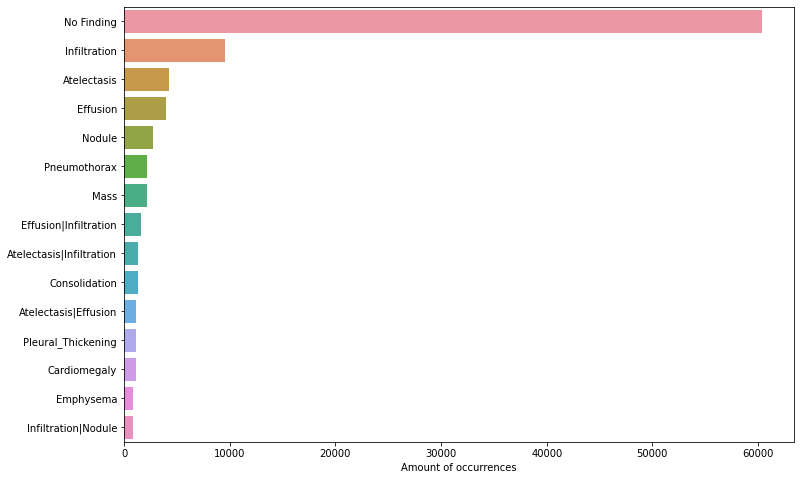

In [5]:
labels_count = df['Finding Labels'].value_counts()[:15]
plt.subplots(figsize=(12, 8))
ax = sns.barplot(labels_count, labels_count.index)
ax.set(xlabel='Amount of occurrences')

In [6]:
df['Finding Labels'] = df['Finding Labels'].map(lambda x: x.replace('No Finding','No_Disease'))
y = []
for x in df['Finding Labels'].unique():
    splitted = x.split('|')
    y = np.append(y, splitted)

y = [x for x in y if len(x) > 0]
y = np.unique(y)
print('All labels ({}): {}'.format(len(y), y))

All labels (14): ['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Effusion'
 'Emphysema' 'Fibrosis' 'Hernia' 'Infiltration' 'Mass' 'No_Disease'
 'Nodule' 'Pleural_Thickening' 'Pneumothorax']


In [7]:
#Test
df['Finding Labels'] = df['Finding Labels'].map(lambda x: x.split('|')[0])

In [8]:
df['Finding Labels'].value_counts()

No_Disease            60358
Infiltration          11564
Atelectasis           11283
Effusion               7914
Consolidation          3250
Nodule                 2987
Mass                   2908
Cardiomegaly           2371
Pneumothorax           2198
Emphysema              1724
Edema                  1559
Fibrosis               1208
Pleural_Thickening     1206
Hernia                  155
Name: Finding Labels, dtype: int64

In [9]:
df['Finding Labels']

0         Cardiomegaly
1         Cardiomegaly
2         Cardiomegaly
3           No_Disease
4               Hernia
              ...     
110680      No_Disease
110681      No_Disease
110682      No_Disease
110683      No_Disease
110684      No_Disease
Name: Finding Labels, Length: 110685, dtype: object

In [10]:
for label in y:
    df[label] = df['Finding Labels'].map(lambda x: 1.0 if label in x else 0.0)

df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No_Disease,Nodule,Pleural_Thickening,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly,1,1,58,M,PA,2894,2729,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No_Disease,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

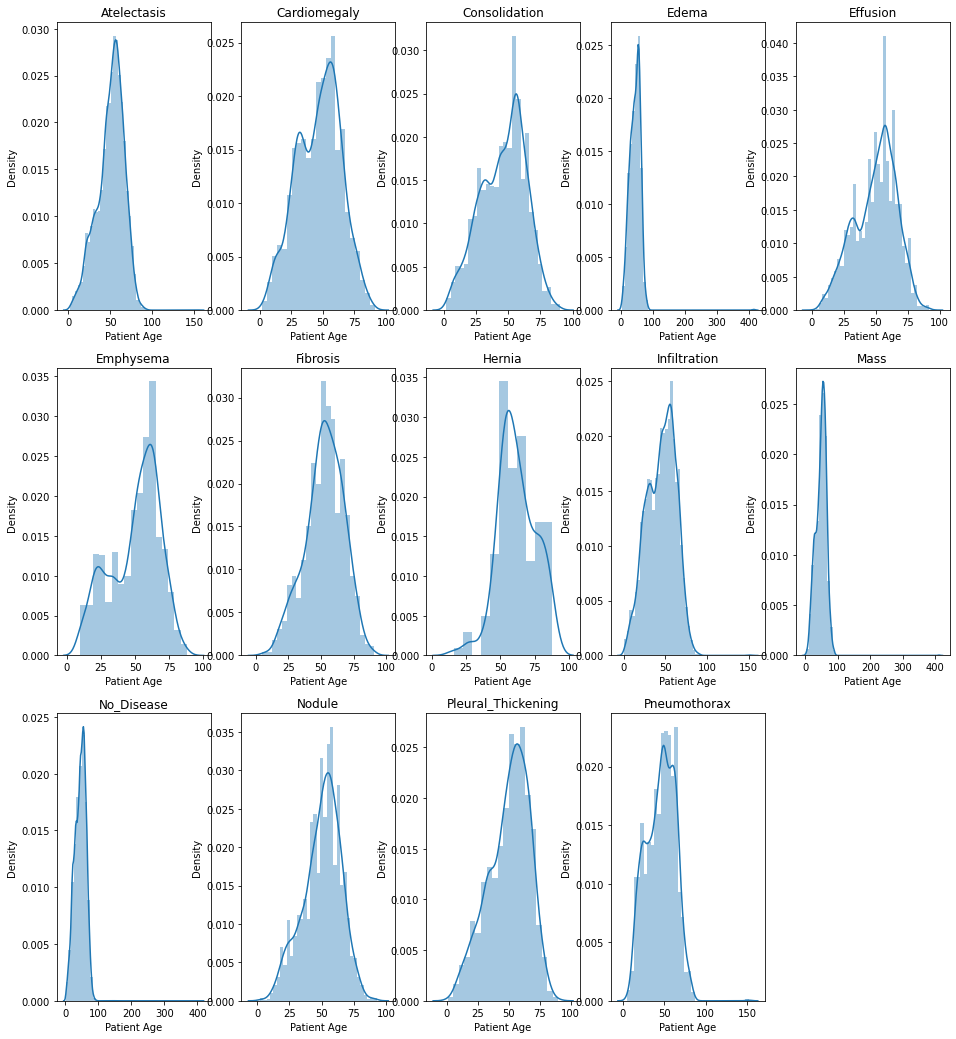

In [11]:
plt.figure(figsize=(16, 18))
for i, column in enumerate(df[y]):
    plt.subplot(3, 5, i+1)
    plt.title(column)
    sns.distplot(df[df[column].where(df[column] == 1.0).notnull()]['Patient Age'])    

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dharvishrd","key":"d460b0b6b1caa7c06009d6a4fa201ba8"}'}

In [13]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Apr 26 16:43 kaggle.json


In [14]:
!pip install -q kaggle

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
credentials = {"username":"dharvishrd" ,"key":"d460b0b6b1caa7c06009d6a4fa201ba8"}
os.environ['KAGGLE_KEY']=credentials["key"]
!kaggle datasets download -d dharvishrd/lung-images
!unzip lung-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images_003/images/00006184_000.png  
  inflating: images_003/images/00006184_001.png  
  inflating: images_003/images/00006185_000.png  
  inflating: images_003/images/00006185_001.png  
  inflating: images_003/images/00006185_002.png  
  inflating: images_003/images/00006186_000.png  
  inflating: images_003/images/00006186_001.png  
  inflating: images_003/images/00006186_002.png  
  inflating: images_003/images/00006186_003.png  
  inflating: images_003/images/00006186_004.png  
  inflating: images_003/images/00006186_005.png  
  inflating: images_003/images/00006186_006.png  
  inflating: images_003/images/00006186_007.png  
  inflating: images_003/images/00006186_008.png  
  inflating: images_003/images/00006187_000.png  
  inflating: images_003/images/00006188_000.png  
  inflating: images_003/images/00006188_001.png  
  inflating: images_003/images/00006189_000.png  
  inflating: images_003/images/00006189_001.png  

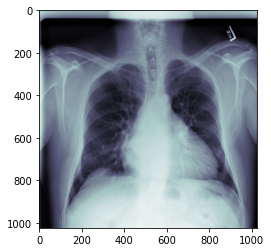

In [17]:
import matplotlib.image as mpimg

img = mpimg.imread("images_001/images/00000001_001.png")
imgplot = plt.imshow(img, cmap='bone')
plt.show()

In [18]:
def get_corresponding_label(image_index):
    return y[df.loc[df['Image Index'] == image_index][y].values.argmax()]

get_corresponding_label("00000652_016.png")

'Infiltration'

In [19]:
def show_images(path='images_001',extension='/images',labeled=False, max_images=12):
    amount = 0
    plt.figure(figsize=(12,8))
    
    for file in os.listdir(path+extension):
        print(file)
        if file.endswith('.png'):
           if amount == max_images:
                break

           ax = plt.subplot(5,4, amount + 1) 
           img = mpimg.imread(os.path.join(path + extension, file))
           plt.imshow(img, cmap='bone')
           ax.set_title(get_corresponding_label(file))
           amount+=1

00001093_002.png
00000506_000.png
00000595_000.png
00001200_001.png
00000825_001.png
00001170_023.png
00000032_017.png
00000951_000.png
00000200_001.png
00001029_005.png
00000211_036.png
00001075_003.png
00000820_002.png


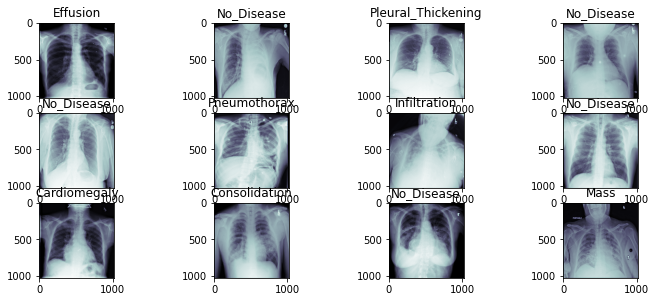

In [20]:
show_images()

In [21]:
df.shape

(110685, 25)

In [22]:
df = df[df['Patient Age'] < 100]
df_image_paths= {os.path.basename(x): x for x in 
                  glob(os.path.join('/content/images_001','*','*.png'))}
print('Scans found:', len(df_image_paths), ', Total Headers', df.shape[0])
df['path'] = df['Image Index'].map(df_image_paths.get)
df['Patient Age'] = df['Patient Age'].map(lambda x: int(x))

Scans found: 4999 , Total Headers 110670


In [23]:
new_df = df.sample(30000)

In [24]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No_Disease,Nodule,Pleural_Thickening,Pneumothorax,path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly,1,1,58,M,PA,2894,2729,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/images_001/images/00000001_002.png
3,00000002_000.png,No_Disease,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,/content/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,/content/images_001/images/00000003_000.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110680,00030801_000.png,No_Disease,0,30801,39,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None
110681,00030802_000.png,No_Disease,0,30802,29,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None
110682,00030803_000.png,No_Disease,0,30803,42,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None
110683,00030804_000.png,No_Disease,0,30804,30,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None


In [25]:
import cv2

In [26]:
new_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No_Disease,Nodule,Pleural_Thickening,Pneumothorax,path
22498,00006019_003.png,Pleural_Thickening,3,6019,55,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,None
30572,00008051_012.png,No_Disease,12,8051,49,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None
81330,00020282_001.png,No_Disease,1,20282,48,M,PA,2730,2597,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None
90680,00022916_000.png,Atelectasis,0,22916,78,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
4326,00001194_004.png,No_Disease,4,1194,41,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,/content/images_001/images/00001194_004.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82682,00020589_005.png,Pneumothorax,5,20589,47,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None
50504,00012914_000.png,Infiltration,0,12914,60,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None
76445,00019037_000.png,No_Disease,0,19037,54,F,PA,3056,2536,0.139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None
20190,00005460_008.png,No_Disease,8,5460,33,M,AP,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None


In [27]:
new_df['Finding Labels'].value_counts()

No_Disease            16243
Infiltration           3122
Atelectasis            3059
Effusion               2154
Consolidation           912
Nodule                  841
Mass                    802
Cardiomegaly            661
Pneumothorax            589
Emphysema               477
Edema                   424
Pleural_Thickening      357
Fibrosis                315
Hernia                   44
Name: Finding Labels, dtype: int64

In [28]:
new_df.shape

(30000, 26)

In [29]:
def read_img(img_path):
    img = cv2.imread(img_path)
    try:
      img = cv2.resize(img,(128,128))
    except:
      pass
    return img
from tqdm import tqdm
train_img = []
for img in sorted(os.listdir('/content/images_001/images')):
    train_img.append(read_img(os.path.join('/content/images_001/images/'+img)))

In [30]:
X = np.array(train_img, np.float32)/255

In [31]:
Y = df[y].values

In [32]:
Y=Y[:4999]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.25,
    random_state=2018
)
print('train', X_train.shape[0], 'val', X_test.shape[0])

train 3749 val 1250


In [34]:
# del X
# del Y
X_train.shape

(3749, 128, 128, 3)

In [35]:
Y_train.shape

(3749, 14)

In [36]:
Y_train=Y_train.reshape((-1,1))

In [37]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential

base_mobilenet_model = MobileNet(
    input_shape=(128,128,3), 
    include_top=False,
    weights=None
)
model = Sequential()
model.add(base_mobilenet_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Dense(len(y), activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 14)                7

In [38]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="{}_weights.best.hdf5".format('xray_class')

checkpoint = ModelCheckpoint(
    weight_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=True
)

early = EarlyStopping(
    monitor="val_loss", 
    mode="min", 
    patience=3
)

callbacks_list = [checkpoint, early]

In [39]:
early_stopping = EarlyStopping(monitor='val_acc',patience=3)

model.fit(
    x=X_train,
    y=Y_train,
    batch_size=100,
    epochs=5,
    validation_split=0.3,
    callbacks=[early_stopping]
)

Epoch 1/5
27/27 [==============================] - 204s 7s/step - loss: 0.6128 - accuracy: 0.8670 - val_loss: 0.9542 - val_accuracy: 0.9289
Epoch 2/5
27/27 [==============================] - 194s 7s/step - loss: 0.4574 - accuracy: 0.9169 - val_loss: 0.5047 - val_accuracy: 0.9289
Epoch 3/5
27/27 [==============================] - 194s 7s/step - loss: 0.3680 - accuracy: 0.9177 - val_loss: 0.3099 - val_accuracy: 0.9289
Epoch 4/5
27/27 [==============================] - 197s 7s/step - loss: 0.3229 - accuracy: 0.9242 - val_loss: 0.2637 - val_accuracy: 0.9289
Epoch 5/5
27/27 [==============================] - 194s 7s/step - loss: 0.2669 - accuracy: 0.9230 - val_loss: 0.2596 - val_accuracy: 0.9289


In [40]:
for c_label, s_count in zip(y, 100*np.mean(Y_test, 0)):
    print('%s:%2.2f%%' % (c_label, s_count))

Atelectasis:10.08%
Cardiomegaly:4.00%
Consolidation:2.32%
Edema:0.88%
Effusion:5.36%
Emphysema:1.44%
Fibrosis:2.08%
Hernia:0.56%
Infiltration:10.40%
Mass:0.80%
No_Disease:56.24%
Nodule:2.32%
Pleural_Thickening:1.76%
Pneumothorax:1.76%


In [41]:
pred_Y = model.predict(X_test, batch_size=32, verbose=True)

40/40 [==============================] - 15s 365ms/step


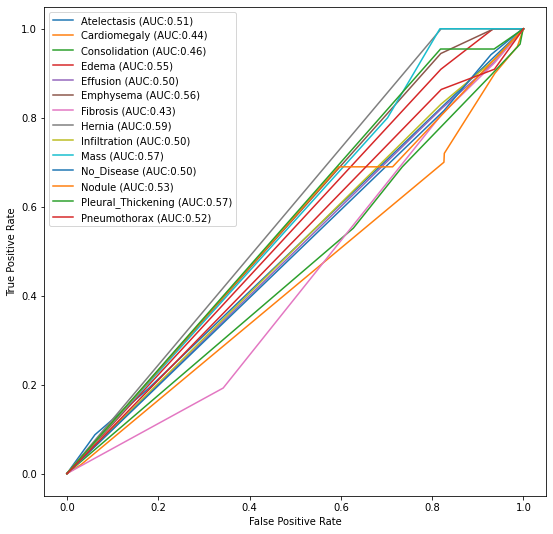

In [42]:
from sklearn.metrics import roc_curve, auc

fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))

for (idx, c_label) in enumerate(y):
    fpr, tpr, thresholds = roc_curve(Y_test[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

In [43]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')

model.fit(x=X_train, y=Y_train, batch_size=100, epochs=8, validation_split=0.3, callbacks=[early_stops])

Epoch 1/8
27/27 [==============================] - 197s 7s/step - loss: 0.2537 - accuracy: 0.9295 - val_loss: 0.2571 - val_accuracy: 0.9289
Epoch 2/8
27/27 [==============================] - 198s 7s/step - loss: 0.2299 - accuracy: 0.9280 - val_loss: 0.2996 - val_accuracy: 0.9289
Epoch 3/8
27/27 [==============================] - 195s 7s/step - loss: 0.1678 - accuracy: 0.9474 - val_loss: 0.3227 - val_accuracy: 0.9289
Epoch 4/8
27/27 [==============================] - 193s 7s/step - loss: 0.1640 - accuracy: 0.9417 - val_loss: 0.3911 - val_accuracy: 0.9289
Epoch 5/8
27/27 [==============================] - 200s 7s/step - loss: 0.1562 - accuracy: 0.9478 - val_loss: 0.3734 - val_accuracy: 0.9289
Epoch 6/8
27/27 [==============================] - 195s 7s/step - loss: 0.1266 - accuracy: 0.9546 - val_loss: 0.4605 - val_accuracy: 0.9289
Epoch 7/8
27/27 [==============================] - 197s 7s/step - loss: 0.1076 - accuracy: 0.9604 - val_loss: 0.4699 - val_accuracy: 0.9289
Epoch 8/8
27/27 [===

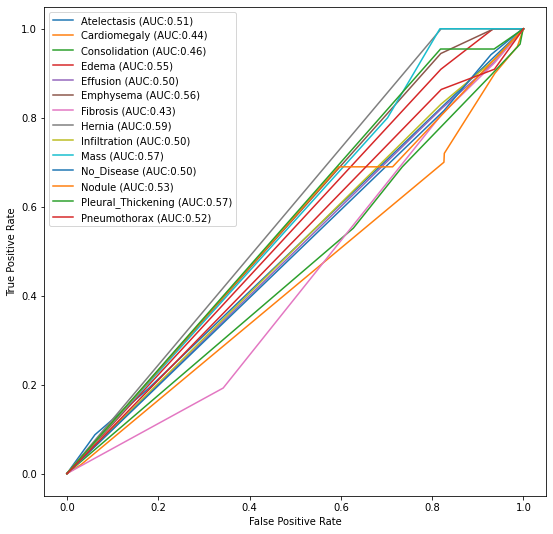

In [44]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))
for (idx, c_label) in enumerate(y):
    fpr, tpr, thresholds = roc_curve(Y_test[:, idx].astype(int), pred_Y[:, idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

In [45]:
model_json = model.to_json()
with open("multi_disease_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("multi_disease_model_weight.h5")
print("Saved model to disk")

Saved model to disk
